# Applied Machine Learning, Homework 5:

Design a genetic algorithm to solve the polynomial fitting problem that we did in Homework #1.
You need to implement a genetic algorithm using BOTH mutation AND crossover operations. You
need to decide a mutation rate and a crossover rate.
Plot the following in one figure: 1) the original noisy data, 2) the polynomial you obtained in
Homework #1, and 3) the polynomial obtained from this implementation. Compare and
discussion the difference in performance of the two polynomials obtained with two different
methods.

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-v0_8-whitegrid') 
import numpy as np 
from sklearn.datasets import make_regression
 
noise_scale = 100 
number_of_samples = 50 
x =  25*(np.random.rand(number_of_samples, 1) - 0.8) 
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)

Randomly generate initial solution set (population) 

Calculate the fitness value (i.e objective function value) for each member of the population

Continue until satisfying solution is found

In [2]:
import random

# Create 100 six-element arrays of random numbers
solutions = np.random.rand(100, 6)

In [3]:
import numpy as np 
from sklearn.metrics import mean_squared_error
# For each of the 100 arrays, compute its fitness score (using all data points)
def fitness(x,y,z): 
    noise_scale = 100 
    number_of_samples = 50 
    x =  25*(np.random.rand(number_of_samples, 1) - 0.8) 
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
    xs = x.flatten()
    ys = y.flatten()
    
    z = np.polyfit(xs, ys, 3)
    p = np.poly1d(z)

    y_pred = p(xs)

    mse = mean_squared_error(ys, y_pred)
    return mse

In [4]:
# Repeat 500 times (or any other number):
for i in range(500):
    rankedSolutions = []
    for s in solutions:
        rankedSolutions.append((fitness(s[0],s[1],s[2]),s))
    rankedSolutions.sort()
    rankedSolutions.reverse()
   
    # Keep the ten best arrays (fitness score largest) and discard the other 90
    bestsolutions = rankedSolutions[:10]
    print(f" ----------- Gen {i} solutions ----------")
    print(bestsolutions)
   
    # From each array you keep, generate nine new arrays as follows:
    newGen = []
    for s in bestsolutions:
        elements = []
        for _ in range(9):
            # Pick a random element of the six
            random_element = np.random.choice(s[1])
            # Pick a random floating-point number between 0.0 and 2.0
            random_num = random.uniform(0.0, 2.0)
            # Multiply the random element of the array by the random floating-point number
            new_element = random_element * random_num
        
            elements.append(new_element)
        newGen.append(elements)
    
    solutions = newGen

 ----------- Gen 0 solutions ----------
[(15267.596764439415, array([0.31741556, 0.65350411, 0.38829237, 0.11917632, 0.79634576,
       0.32011051])), (14180.663550674519, array([0.01865595, 0.84378574, 0.99162032, 0.57873785, 0.09198001,
       0.8174791 ])), (13996.591781194647, array([0.57238415, 0.62371421, 0.33092117, 0.87654133, 0.09328079,
       0.5043092 ])), (13858.806469930862, array([0.48998923, 0.76865194, 0.40654994, 0.25540136, 0.71834728,
       0.96762992])), (13449.777170830657, array([0.82871805, 0.74000173, 0.20308236, 0.34705087, 0.4101463 ,
       0.03262229])), (13380.5849412766, array([0.43207791, 0.5357136 , 0.31837721, 0.10358987, 0.08432184,
       0.37676523])), (13303.294920547232, array([0.64852717, 0.90053417, 0.74674625, 0.02198348, 0.17590885,
       0.22118655])), (13206.179359698515, array([0.74572146, 0.32100612, 0.11108747, 0.41773508, 0.42702356,
       0.70233376])), (13053.21433076791, array([0.04266377, 0.62795673, 0.32120515, 0.03063056, 0.8937

In [5]:
# Pick the best array as the final answer
fitnessArr = []
for individual in solutions:
    fitnessArr.append(individual[0])

idx = max(range(len(solutions)), key=lambda i: fitnessArr[i])
best_array = solutions[idx]

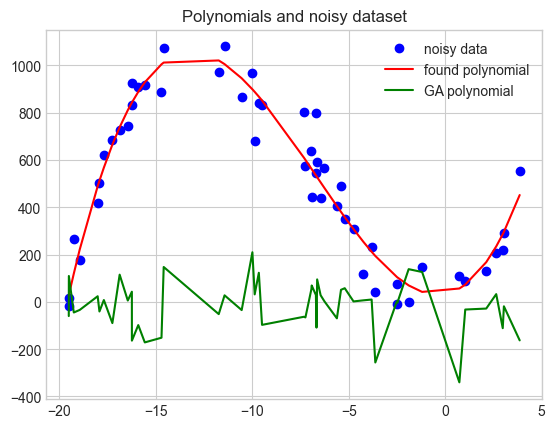

In [6]:
plt.figure()
plt.title('Polynomials and noisy dataset')


plt.plot(x,y,'bo', label = 'noisy data')

# flatten() returns 1D flattened array for polyfit to take as input
xs = x.flatten()
ys = y.flatten()

z = np.polyfit(xs, ys, 3)
p = np.poly1d(z)

# sort coordinates to be able to plot (x, p(x)) correctly
s = np.argsort(xs)
xs = xs[s]
ys = ys[s]

plt.plot(xs, p(xs),'r', label = 'found polynomial')

x1 = best_array[0]
x2 = best_array[1]
x3 = best_array[2]

xn = np.linspace(-20, 5, 50)
y = 5 * x1 + 20 * x2**2 + 1 * x3**3 + noise_scale*np.random.randn(number_of_samples, 1)

plt.plot(xs, y, 'g', label = 'GA polynomial')


plt.legend()
plt.show()

Not sure why the GA polynomial line does not reach higher numbers but does fit the other points of the noisy data.